<a href="https://colab.research.google.com/github/flediak/Euclid_IA_KP_paper0/blob/main/notebooks/plot_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
import pandas as pd
import numpy as np
import zipfile

# install latex

In [2]:
!apt install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


# download data and unzip

In [3]:
! gdown 1X_dKwoPWkNg3eWAh_qiWl6U81st5OK5y

Downloading...
From: https://drive.google.com/uc?id=1X_dKwoPWkNg3eWAh_qiWl6U81st5OK5y
To: /content/correlations.zip
100% 12.0k/12.0k [00:00<00:00, 15.7MB/s]


In [4]:
#doesn't extract the files for some reason..
#with zipfile.ZipFile("correlations.zip") as archive:
#  archive.extractall("correlations/")

In [5]:
! unzip correlations.zip

Archive:  correlations.zip
   creating: correlations/
  inflating: correlations/corr_lowz-l3.csv  
  inflating: correlations/corr_lowz-l1.csv  
  inflating: correlations/corr_lowz-l2.csv  
  inflating: correlations/corr_lowz-l4.csv  
  inflating: correlations/corr_sdss-red.csv  
  inflating: correlations/corr_sdss-blue.csv  
  inflating: correlations/corr_hagn-z1p0m1.csv  
  inflating: correlations/corr_hagn-z1p0m2.csv  
  inflating: correlations/corr_hagn-z1p0m3.csv  
  inflating: correlations/corr_lowz-l2_ref.csv  
  inflating: correlations/corr_lowz-l1_ref.csv  
  inflating: correlations/corr_lowz-l3_ref.csv  
  inflating: correlations/corr_lowz-l4_ref.csv  
  inflating: correlations/corr_sdss-red_ref.csv  
  inflating: correlations/corr_sdss-blue_ref.csv  
  inflating: correlations/corr_hagn-z1p0m1_ref.csv  
  inflating: correlations/corr_hagn-z1p0m2_ref.csv  
  inflating: correlations/corr_hagn-z1p0m3_ref.csv  


# read data into dictionaries

In [6]:
corr_obs = {'lowz-l1':[],
            'lowz-l2':[],
            'lowz-l3':[],
            'lowz-l4':[],
            'sdss-red':[],
            'sdss-blue':[],
            }

corr_obs_ref = {'lowz-l1_ref':[],
            'lowz-l2_ref':[],
            'lowz-l3_ref':[],
            'lowz-l4_ref':[],
            'sdss-red_ref':[],
            'sdss-blue_ref':[],
            }


corr_hagn = {'hagn-z1p0m1':[],
             'hagn-z1p0m2':[],
             'hagn-z1p0m3':[],
            }

corr_hagn_ref = {'hagn-z1p0m1_ref':[],
             'hagn-z1p0m2_ref':[],
             'hagn-z1p0m3_ref':[],
            }


In [7]:
def read_correlations(dir_corr, dict_corr):

  for key in dict_corr:
    fname = dir_corr + 'corr_' + key + '.csv'
    dict_corr[key] = pd.read_csv(fname, sep = ',')

  return dict_corr

In [8]:
dir_corr = 'correlations/'

corr_obs = read_correlations(dir_corr, corr_obs)
corr_obs_ref = read_correlations(dir_corr, corr_obs_ref)

corr_hagn = read_correlations(dir_corr, corr_hagn)
corr_hagn_ref = read_correlations(dir_corr, corr_hagn_ref)

In [9]:
#corr_obs['lowz-l1']
corr_hagn['hagn-z1p0m1']

,r,r12_v1a,r12_v1a_std,r12_v1b,r12_v1b_std
0,0.134928,0.505646,0.004600,0.495931,0.005959
1,0.245646,0.506731,0.002373,0.490726,0.003546
2,0.447214,0.513816,0.004673,0.486570,0.002943
3,0.814181,0.524743,0.002956,0.476516,0.002746
4,1.482269,0.533493,0.002629,0.467537,0.003350
5,2.698566,0.528339,0.003062,0.471831,0.002728
6,4.912912,0.519195,0.001202,0.480661,0.001434
7,8.944272,0.510638,0.001092,0.489738,0.001265
8,16.283621,0.504947,0.000856,0.494692,0.000944
9,29.645378,0.502663,0.001014,0.497392,0.001058


# plot $w_{gg}$
note: latex error on first execution can be solved by running the cell again

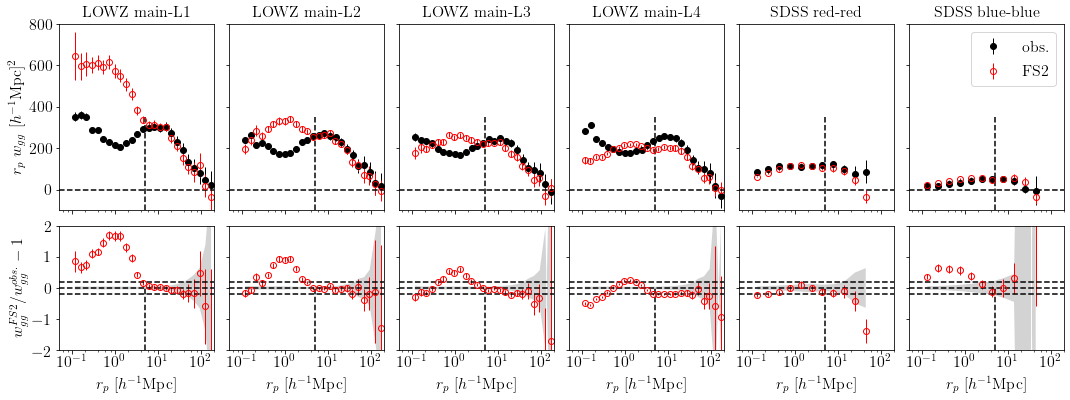

In [11]:
Ncol = len(corr_obs)

fig, ax = plt.subplots(2,Ncol,figsize=(Ncol*3,6), sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 2]})

fontsize = 16
plt.rc('font', family='serif')
plt.rc('text', usetex=True)


#put correlations in list
corr = []
for key in corr_obs: 
  corr.append(corr_obs[key])

corr_ref = []
for key in corr_obs_ref: 
  corr_ref.append(corr_obs_ref[key])


# ============ wgg ==============
row = 0

for i in range(Ncol): 

  #reference
  ax[row,i].errorbar(corr_ref[i].rp,
                     corr_ref[i].rp*corr_ref[i].wgg,
                     corr_ref[i].rp*corr_ref[i].wggerr,
                     color='k',linestyle='', lw=1, label='obs.', marker='o')
  
  #FS2
  ax[row,i].errorbar(corr[i].rp,
                     corr[i].rp*corr[i].wgg,
                     corr[i].rp*corr[i].wggerr,
                     color='r',linestyle='', lw=1, label='FS2', marker='o', fillstyle='none')



# ============ wgg_sim / wgg_obs -1 ==============
row = 1

for i in range(Ncol): 

  ax[row,i].fill_between(
                    corr_ref[i].rp,
                    -corr_ref[i].wggerr / corr_ref[i].wgg,
                    corr_ref[i].wggerr / corr_ref[i].wgg,
                    facecolor='lightgrey', interpolate=True)

  ax[row,i].errorbar(corr[i].rp,
                     corr[i].wgg / corr_ref[i].wgg-1,
                     corr[i].wggerr / corr_ref[i].wgg,
                     color='r',linestyle='', lw=1, label='FS2', marker='o', fillstyle='none')
    


# ================== config. ================
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

# set spacing between panels
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# axis labels
ax[0,0].set_ylabel(r'$r_p \ w_{gg} \ [h^{-1}\textrm{Mpc}]^2$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$w_{gg}^{FS2} / w_{gg}^{obs.} - 1$',fontsize=fontsize)
#ax[1,0].set_ylabel(r'$\frac{w_{gg}^{FS2}}{w_{gg}^{obs.}} - 1$',fontsize=fontsize)

#titles
titles = ['LOWZ main-L1', 'LOWZ main-L2', 'LOWZ main-L3', 'LOWZ main-L4', 'SDSS red-red', 'SDSS blue-blue']
for i in range(Ncol):  
  ax[0,i].set_title(titles[i],fontsize=fontsize)



#out legend in last column
ax[0,-1].legend(fontsize=fontsize)


# set y-tics
ax[1,0].set_yticks(np.arange(-200, 1000, step=200))#top row
ax[1,0].set_yticks(np.arange(-10, 10, step=1))#bottom row


#settings for all columns
for col in range(Ncol):

  x_vline = 5

  row=0
  ax[row,col].set_ylim(-100,800)
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
   
  row=1
  ax[row,col].set_ylim(-2,2)
  ax[row,col].axhline(y=-0.2, c='k', ls='--')
  ax[row,col].axhline(y=0.2, c='k', ls='--')
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
  ax[row,col].set_xlabel(r'$r_p \ [h^{-1}\textrm{Mpc}]$',fontsize=fontsize)

  for row in range(2):
   
    ax[row,col].set_xlim(0.05,200)
    ax[row,col].set_xscale('log')
    ax[row,col].axhline(y=0, c='k', ls='--')
    #see https://matplotlib.org/stable/gallery/ticks/tick-locators.html
    ax[row, col].xaxis.get_major_locator().set_params(base=10,numticks=10)
    ax[row, col].xaxis.get_minor_locator().set_params(numticks=10, subs=[.2, .4, .6, .8])
    ax[row,col].tick_params(axis='both',labelsize=fontsize)

plt.savefig("wgg_fs2_vs_obs.pdf",bbox_inches='tight', pad_inches = 0.1)
plt.show()

# plot $w_{g+}$

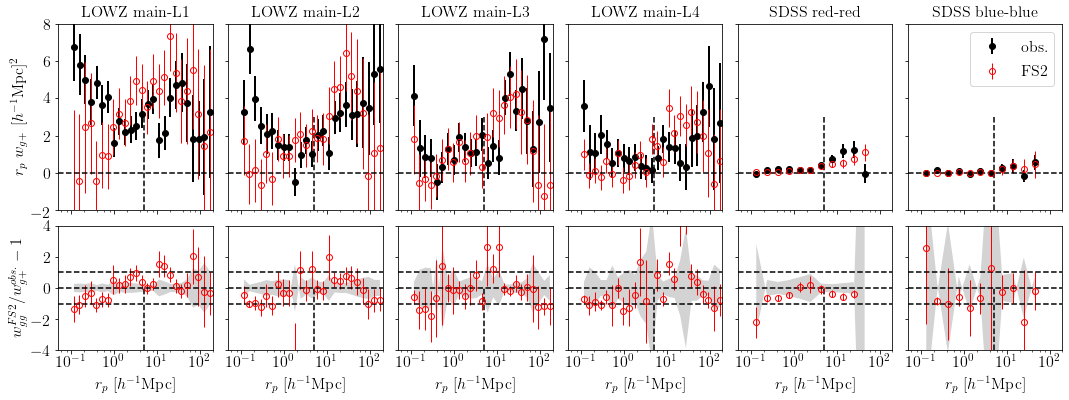

In [12]:
Ncol = len(corr_obs)

fig, ax = plt.subplots(2,Ncol,figsize=(Ncol*3,6), sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 2]})

fontsize = 16

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#put correlations in list
corr = []
for key in corr_obs: 
  corr.append(corr_obs[key])

corr_ref = []
for key in corr_obs_ref: 
  corr_ref.append(corr_obs_ref[key])


# ============ wgp ==============
row = 0

for i in range(Ncol): 

  #reference
  ax[row,i].errorbar(corr_ref[i].rp,
                     corr_ref[i].rp*corr_ref[i].wgp,
                     corr_ref[i].rp*corr_ref[i].wgperr,
                     color='k',linestyle='', lw=2, label='obs.', marker='o')
  
  #FS2
  ax[row,i].errorbar(corr[i].rp,
                     corr[i].rp*corr[i].wgp,
                     corr[i].rp*corr[i].wgperr,
                     color='r',linestyle='', lw=1, label='FS2', marker='o', fillstyle='none')



# ============ wgp_sim / wgp_obs -1 ==============
row = 1

for i in range(Ncol): 

  ax[row,i].fill_between(
                    corr_ref[i].rp,
                    -corr_ref[i].wgperr / corr_ref[i].wgp,
                    corr_ref[i].wgperr / corr_ref[i].wgp,
                    facecolor='lightgrey', interpolate=True)

  ax[row,i].errorbar(corr[i].rp,
                     corr[i].wgp / corr_ref[i].wgp-1,
                     corr[i].wgperr / corr_ref[i].wgp,
                     color='r',linestyle='', lw=1, label='FS2', marker='o', fillstyle='none')
    


# ================== config. ================
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

# set spacing between panels
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# axis labels
ax[0,0].set_ylabel(r'$r_p \ w_{g+} \ [h^{-1}\textrm{Mpc}]^2$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$w_{gg}^{FS2} / w_{g+}^{obs.} - 1$',fontsize=fontsize)
#ax[1,0].set_ylabel(r'$\frac{w_{g+}^{FS2}}{w_{g+}^{obs.}} - 1$',fontsize=fontsize)

#titles
titles = ['LOWZ main-L1', 'LOWZ main-L2', 'LOWZ main-L3', 'LOWZ main-L4', 'SDSS red-red', 'SDSS blue-blue']
for i in range(Ncol):  
  ax[0,i].set_title(titles[i],fontsize=fontsize)



#out legend in last column
ax[0,-1].legend(fontsize=fontsize)


# set y-tics
ax[0,0].set_yticks(np.arange(-10, 10, step=2))#top row
ax[1,0].set_yticks(np.arange(-10, 10, step=2))#bottom row


#settings for all columns
for col in range(Ncol):

  x_vline = 5

  row=0
  ax[row,col].set_ylim(-2,8)
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
   
  row=1
  ax[row,col].set_ylim(-4,4)
  ax[row,col].axhline(y=-1, c='k', ls='--')
  ax[row,col].axhline(y=1, c='k', ls='--')
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
  ax[row,col].set_xlabel(r'$r_p \ [h^{-1}\textrm{Mpc}]$',fontsize=fontsize)

  for row in range(2):
   
    ax[row,col].set_xlim(0.05,200)
    ax[row,col].set_xscale('log')
    ax[row,col].axhline(y=0, c='k', ls='--')
    #see https://matplotlib.org/stable/gallery/ticks/tick-locators.html
    ax[row, col].xaxis.get_major_locator().set_params(base=10,numticks=10)
    ax[row, col].xaxis.get_minor_locator().set_params(numticks=10, subs=[.2, .4, .6, .8])
    ax[row,col].tick_params(axis='both',labelsize=fontsize)

plt.savefig("wgp_fs2_vs_obs.pdf",bbox_inches='tight', pad_inches = 0.1)
plt.show()

# download plots

In [13]:
from google.colab import files

In [14]:
files.download("wgg_fs2_vs_obs.pdf")
files.download("wgp_fs2_vs_obs.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# plot $\eta$

In [15]:
corr_hagn['hagn-z1p0m1']

,r,r12_v1a,r12_v1a_std,r12_v1b,r12_v1b_std
0,0.134928,0.505646,0.004600,0.495931,0.005959
1,0.245646,0.506731,0.002373,0.490726,0.003546
2,0.447214,0.513816,0.004673,0.486570,0.002943
3,0.814181,0.524743,0.002956,0.476516,0.002746
4,1.482269,0.533493,0.002629,0.467537,0.003350
5,2.698566,0.528339,0.003062,0.471831,0.002728
6,4.912912,0.519195,0.001202,0.480661,0.001434
7,8.944272,0.510638,0.001092,0.489738,0.001265
8,16.283621,0.504947,0.000856,0.494692,0.000944
9,29.645378,0.502663,0.001014,0.497392,0.001058


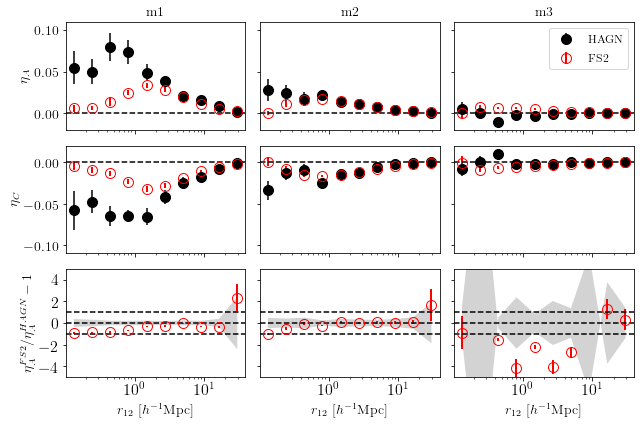

In [16]:
Ncol = len(corr_hagn)

fig, ax = plt.subplots(3,Ncol,figsize=(9,6), sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 3, 3]})

plt.subplots_adjust(wspace=0.1, hspace=0.2)

fontsize=14
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('text', usetex=True)


#put correlations in list
corr = []
for key in corr_hagn:
  corr.append(corr_hagn[key])

corr_ref = []
for key in corr_hagn_ref: 
  corr_ref.append(corr_hagn_ref[key])

#============== plt correlations =============
col = 0

for i in range(Ncol):

  #FS2
  ax[0,i].errorbar(corr_ref[i].r, corr_ref[i].r12_v1a-0.5, corr_ref[i].r12_v1a_std, c='k', marker='o', ms=10, ls='', label='HAGN')
  ax[1,i].errorbar(corr_ref[i].r, corr_ref[i].r12_v1b-0.5, corr_ref[i].r12_v1b_std, c='k', marker='o', ms=10, ls='', label='HAGN')

  #HAGN
  ax[0,i].errorbar(corr[i].r, corr[i].r12_v1a-0.5, corr[i].r12_v1a_std, c='r', marker='o', lw=2, ms=10, fillstyle='none', ls='', label='FS2')
  ax[1,i].errorbar(corr[i].r, corr[i].r12_v1b-0.5, corr[i].r12_v1b_std, c='r', marker='o', lw=2, ms=10, fillstyle='none', ls='', label='FS2')


  #FS2 / HAGN - 1
  ax[2,i].fill_between(
                    corr_ref[i].r,
                    -corr_ref[i].r12_v1a_std / (corr_ref[i].r12_v1a-0.5),
                    corr_ref[i].r12_v1a_std / (corr_ref[i].r12_v1a-0.5),
                    facecolor='lightgrey', interpolate=True)

  ax[2,i].errorbar(
      corr[i].r,
      (corr[i].r12_v1a-0.5) / (corr_ref[i].r12_v1a-0.5) - 1,
      (corr[i].r12_v1a_std) / (corr_ref[i].r12_v1a-0.5),
      c='r', marker='o', lw=2, ms=10, fillstyle='none', ls='', label='FS2')

ax[0,0].set_ylabel(r'$\eta_A$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$\eta_C$',fontsize=fontsize)
ax[2,0].set_ylabel(r'$\eta_A^{FS2} / \eta_A^{HAGN}-1$',fontsize=14)

#============ config ===========

titles = ['m1', 'm2', 'm3']


# set y-tics
ax[0,0].set_yticks(np.arange(-0.2, 0.2, step=0.05))#top row
ax[1,0].set_yticks(np.arange(-0.2, 0.2, step=0.05))#top row
ax[2,0].set_yticks(np.arange(-6, 6, step=2))#central row


for i in range(Ncol):
    

    ax[0,i].set_title(titles[i], fontsize = fontsize)

    ax[-1,i].set_xlabel(r'$r_{12} \ [h^{-1} \textrm{Mpc}]$', fontsize = fontsize)
    
    ax[0,i].set_ylim(-0.02,0.11)
    ax[1,i].set_ylim(-0.11,0.02)
    ax[2,i].set_ylim(-5,5)

    ax[2,i].axhline(y=-1, c='k', ls='--')
    ax[2,i].axhline(y=1, c='k', ls='--')

    for j in range(3):
        ax[j,i].axhline(y=0.0, c='k', linestyle='--')
        
    for j in range(2):
        ax[j,i].set_xscale('log')
        ax[j,i].tick_params(axis='both',labelsize=fontsize)

ax[0,-1].legend(loc='upper right', fontsize = 12)
 

plt.tight_layout()
plt.savefig('eta_fs2_vs_hagn.pdf', bbox_inches='tight',transparent=False, pad_inches=0.2)
plt.show()

plt.show()

In [17]:
files.download("eta_fs2_vs_hagn.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>